### **Mounting the Drive**

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
# drive.mount('/content/drive')

In [ ]:
# training_path = "/content/drive/My Drive/datasets/Training"
# testing_path = "/content/drive/My Drive/datasets/Testing"
# %cd $training_path

!unzip "/content/drive/My Drive/datasets/archive.zip" -d "/content"

Archive:  /content/drive/My Drive/datasets/archive.zip
  inflating: /content/Testing/glioma_tumor/image(1).jpg  
  inflating: /content/Testing/glioma_tumor/image(10).jpg  
  inflating: /content/Testing/glioma_tumor/image(100).jpg  
  inflating: /content/Testing/glioma_tumor/image(11).jpg  
  inflating: /content/Testing/glioma_tumor/image(12).jpg  
  inflating: /content/Testing/glioma_tumor/image(13).jpg  
  inflating: /content/Testing/glioma_tumor/image(14).jpg  
  inflating: /content/Testing/glioma_tumor/image(15).jpg  
  inflating: /content/Testing/glioma_tumor/image(16).jpg  
  inflating: /content/Testing/glioma_tumor/image(17).jpg  
  inflating: /content/Testing/glioma_tumor/image(18).jpg  
  inflating: /content/Testing/glioma_tumor/image(19).jpg  
  inflating: /content/Testing/glioma_tumor/image(2).jpg  
  inflating: /content/Testing/glioma_tumor/image(20).jpg  
  inflating: /content/Testing/glioma_tumor/image(21).jpg  
  inflating: /content/Testing/glioma_tumor/image(22).jpg  
  

### **Loading the Libraries**

In [ ]:
import os
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from google.colab.patches import cv2_imshow

import time

from tqdm import tqdm

### **Loading the Train and Test Data**

In [ ]:
IMG_SIZE = 150

labels = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]
data_train, y_detect_train, y_class_train = [], [], []

training_path = "/content/Training"

for label in labels:
  print(label)
  path = os.path.join(training_path, label)
  for img in tqdm(os.listdir(path)):
    image = cv2.imread(os.path.join(path, img))
    #print(image.shape)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    data_train.append(image)
    y_class_train.append(label)
    tmp = 0 if label == "no_tumor" else 1
    y_detect_train.append(tmp)
data_train = np.array(data_train)

glioma_tumor


100%|██████████| 826/826 [00:03<00:00, 267.01it/s]


meningioma_tumor


100%|██████████| 822/822 [00:02<00:00, 284.64it/s]


no_tumor


100%|██████████| 395/395 [00:01<00:00, 363.89it/s]


pituitary_tumor


100%|██████████| 827/827 [00:03<00:00, 256.36it/s]


In [ ]:
# import seaborn as sns

# train = {'glioma' : 826, 'meningioma' : 822, 'no tumor' : 395, 'pituitary' : 827}
# test = {'glioma' : 100, 'meningioma' : 115, 'no tumor' : 105, 'pituitary' : 74}

# train = pd.DataFrame([
#                       {'type': 'glioma', 'count': 826},
#                       {'type': 'meningioma', 'count': 822},
#                       {'type': 'no tumor', 'count': 395},
#                       {'type': 'pituitary', 'count': 827}
# ])

# test = pd.DataFrame([
#                       {'type': 'glioma', 'count': 100},
#                       {'type': 'meningioma', 'count': 115},
#                       {'type': 'no tumor', 'count': 105},
#                       {'type': 'pituitary', 'count': 74}
# ])

# sns.set_theme(style="whitegrid")
# ax1 = sns.barplot(x='type', y='count', data=train)
# ax1.set_title('Train')

In [ ]:
data_test, y_detect_test, y_class_test = [], [], []

testing_path = "/content/Testing"

for label in labels:
  print(label)
  path = os.path.join(testing_path, label)
  for img in tqdm(os.listdir(path)):
    image = cv2.imread(os.path.join(path, img))
    #print(img)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    data_test.append(image)
    y_class_test.append(label)
    tmp = 0 if label == 'no_tumor' else 1
    y_detect_test.append(tmp)
data_test = np.array(data_test)

glioma_tumor


100%|██████████| 100/100 [00:00<00:00, 329.14it/s]


meningioma_tumor


100%|██████████| 115/115 [00:00<00:00, 422.44it/s]


no_tumor


100%|██████████| 105/105 [00:00<00:00, 713.14it/s]


pituitary_tumor


100%|██████████| 74/74 [00:00<00:00, 140.55it/s]


In [ ]:
# ax2 = sns.barplot(x='type', y='count', data=test)
# ax2.set_title('Test')

### **Converting into Grayscale**

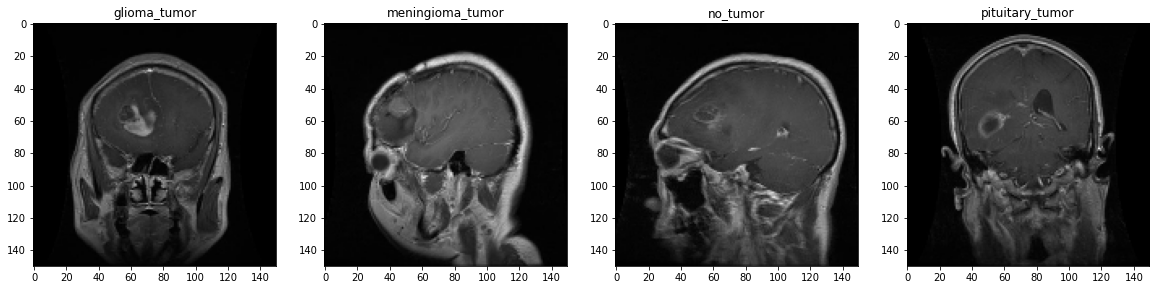

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(20,20))

idx1 = np.random.choice(list(range(0,826)))
idx2 = np.random.choice(list(range(826,1648)))
idx3 = np.random.choice(list(range(1648,2044)))
idx4 = np.random.choice(list(range(2044, 2871)))

idxs = [idx1, idx2, idx3, idx4]

for i, label in enumerate(labels):
  ax[i].imshow(data_train[i])
  ax[i].set_title(label)

In [ ]:
X_train = [cv2.cvtColor(data_train[i], cv2.COLOR_BGR2GRAY) for i in range(len(data_train))]
X_test = [cv2.cvtColor(data_test[i], cv2.COLOR_BGR2GRAY) for i in range(len(data_test))]

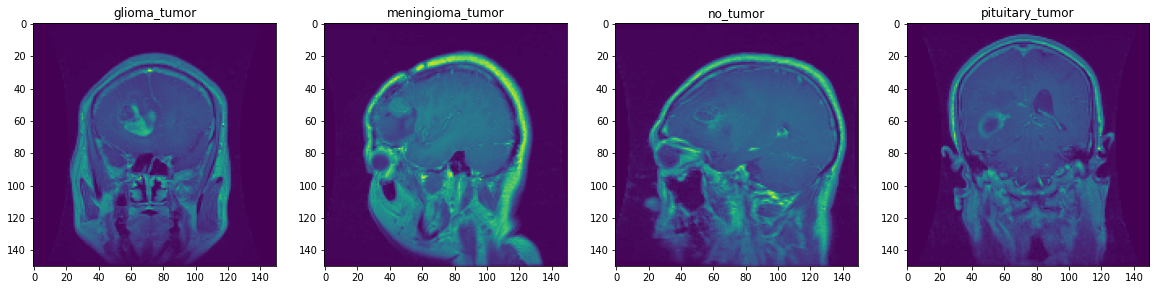

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(20,20))

idx1 = np.random.choice(list(range(0,826)))
idx2 = np.random.choice(list(range(826,1648)))
idx3 = np.random.choice(list(range(1648,2044)))
idx4 = np.random.choice(list(range(2044, 2871)))

idxs = [idx1, idx2, idx3, idx4]

for i, label in enumerate(labels):
  ax[i].imshow(X_train[i])
  ax[i].set_title(label)

### **Tracking Scores**

In [ ]:
history = []

### **PCA**

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [ ]:
t = time.time()
pca = PCA(n_components=150, svd_solver='randomized', whiten=True).fit(X_train.reshape(X_train.shape[0], -1))
#print(pca.explained_variance_ratio_)
print(time.time() - t)

14.805828094482422


In [ ]:
X_train_pca = pca.transform(X_train.reshape(X_train.shape[0], -1))
X_test_pca = pca.transform(X_test.reshape(X_test.shape[0], -1))

#X_train_pca = X_train.reshape(X_train.shape[0], -1)
#X_test_pca = X_test.reshape(X_test.shape[0], -1)

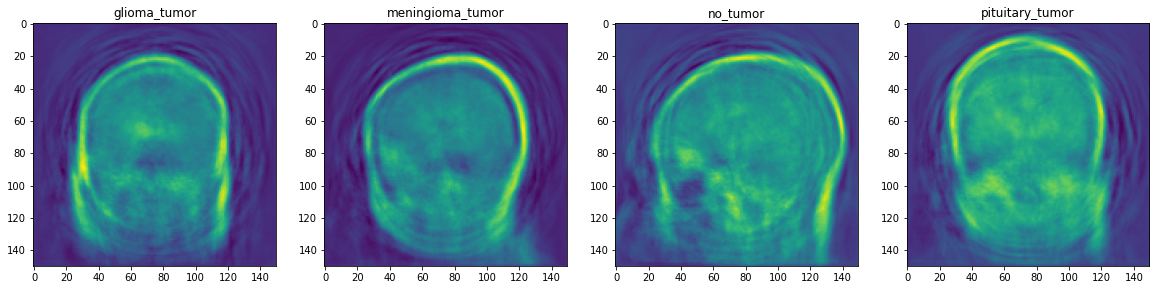

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(20,20))

idx1 = np.random.choice(list(range(0,826)))
idx2 = np.random.choice(list(range(826,1648)))
idx3 = np.random.choice(list(range(1648,2044)))
idx4 = np.random.choice(list(range(2044, 2871)))

idxs = [idx1, idx2, idx3, idx4]

for i, label in enumerate(labels):
  ax[i].imshow(pca.inverse_transform(X_train_pca)[i].reshape(150, 150))
  ax[i].set_title(label)

## **No Pre-processing**

#### **Naive Bayes**

In [ ]:
nb_class = GaussianNB()
nb_class.fit(X_train_pca, y_class_train)
nb_class_score = nb_class.score(X_test_pca, y_class_test)
print(nb_class_score)

nb_detect = GaussianNB()
nb_detect.fit(X_train_pca, y_detect_train)
nb_detect_score = nb_detect.score(X_test_pca, y_detect_test)
print(nb_detect_score)

0.28426395939086296
0.41624365482233505


In [ ]:
print(classification_report(y_class_test, nb_class.predict(X_test_pca)))
print(classification_report(y_detect_test, nb_detect.predict(X_test_pca)))

                  precision    recall  f1-score   support

    glioma_tumor       0.35      0.25      0.29       100
meningioma_tumor       0.24      0.18      0.21       115
        no_tumor       0.23      0.46      0.31       105
 pituitary_tumor       0.60      0.24      0.35        74

        accuracy                           0.28       394
       macro avg       0.36      0.28      0.29       394
    weighted avg       0.33      0.28      0.28       394

              precision    recall  f1-score   support

           0       0.24      0.54      0.33       105
           1       0.69      0.37      0.48       289

    accuracy                           0.42       394
   macro avg       0.46      0.46      0.41       394
weighted avg       0.57      0.42      0.44       394



In [ ]:
history.append({'Classification': nb_class_score, 'Detection': nb_detect_score})

#### **kNN**

In [ ]:
knn_class = KNeighborsClassifier(n_neighbors=5)
knn_class.fit(X_train_pca, y_class_train)
knn_class_score = knn_class.score(X_test_pca, y_class_test)
print(knn_class_score)

knn_detect = KNeighborsClassifier(n_neighbors=5)
knn_detect.fit(X_train_pca, y_detect_train)
knn_detect_score = knn_detect.score(X_test_pca, y_class_test)
print(knn_detect_score)

0.5101522842639594
0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:211: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


In [ ]:
print(classification_report(y_class_test, knn_class.predict(X_test_pca)))
print(classification_report(y_detect_test, knn_detect.predict(X_test_pca)))

                  precision    recall  f1-score   support

    glioma_tumor       0.42      0.54      0.47       100
meningioma_tumor       0.86      0.37      0.51       115
        no_tumor       0.51      0.71      0.60       105
 pituitary_tumor       0.42      0.41      0.41        74

        accuracy                           0.51       394
       macro avg       0.55      0.51      0.50       394
    weighted avg       0.57      0.51      0.51       394

              precision    recall  f1-score   support

           0       0.55      0.71      0.62       105
           1       0.88      0.79      0.83       289

    accuracy                           0.77       394
   macro avg       0.72      0.75      0.73       394
weighted avg       0.80      0.77      0.78       394



In [ ]:
history.append({'Classification': knn_class_score,'Detection': knn_detect_score})

#### **Logistic Regression**

In [ ]:
lg_class = LogisticRegression()
lg_class.fit(X_train_pca, y_class_train)
lg_class_score = lg_class.score(X_test_pca, y_class_test)
print(lg_class_score)

lg_detect = LogisticRegression()
lg_detect.fit(X_train_pca, y_detect_train)
lg_detect_score = lg_detect.score(X_test_pca, y_detect_test)
print(lg_detect_score)

0.5126903553299492
0.682741116751269


In [ ]:
print(classification_report(y_class_test, lg_class.predict(X_test_pca)))
print(classification_report(y_detect_test, lg_detect.predict(X_test_pca)))

                  precision    recall  f1-score   support

    glioma_tumor       0.53      0.18      0.27       100
meningioma_tumor       0.53      0.62      0.57       115
        no_tumor       0.43      0.72      0.54       105
 pituitary_tumor       0.71      0.50      0.59        74

        accuracy                           0.51       394
       macro avg       0.55      0.51      0.49       394
    weighted avg       0.54      0.51      0.49       394

              precision    recall  f1-score   support

           0       0.43      0.57      0.49       105
           1       0.82      0.72      0.77       289

    accuracy                           0.68       394
   macro avg       0.63      0.65      0.63       394
weighted avg       0.72      0.68      0.70       394



In [ ]:
history.append({'Classification': lg_class_score,'Detection': lg_detect_score})

#### **Random Forest**

In [ ]:
# rf_class = RandomForestClassifier(n_estimators=1000)
# rf_class.fit(X_train_pca, y_class_train)
# rf_class_score = rf_class.score(X_test_pca, y_detect_test)
# print(rf_class_score)

rf_detect = RandomForestClassifier(n_estimators=1000)
rf_detect.fit(X_train_pca, y_detect_train)
rf_detect_score = rf_detect.score(X_test_pca, y_detect_test)
print(rf_detect_score)

0.9517766497461929


In [ ]:
#print(classification_report(y_class_test, rf_class.predict(X_test_pca)))
print(classification_report(y_detect_test, rf_detect.predict(X_test_pca)))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       105
           1       1.00      0.79      0.88       289

    accuracy                           0.85       394
   macro avg       0.82      0.89      0.83       394
weighted avg       0.90      0.85      0.85       394



In [ ]:
history.append({'Classification': rf_class_score,'Detection': rf_detect_score})

#### **SVM**

In [ ]:
svm_class = SVC(kernel='rbf')
svm_detect = SVC(kernel='rbf')

svm_class.fit(X_train_pca, y_class_train)
svm_detect.fit(X_train_pca, y_detect_train)

svm_class_score = svm_class.score(X_test_pca, y_class_test)
svm_detect_score = svm_detect.score(X_test_pca, y_detect_test)

print(svm_class_score)
print(svm_detect_score)

0.6979695431472082
0.8730964467005076


In [ ]:
print(classification_report(y_class_test, svm_class.predict(X_test_pca)))

                  precision    recall  f1-score   support

    glioma_tumor       0.67      0.22      0.33       100
meningioma_tumor       0.74      0.94      0.83       115
        no_tumor       0.61      0.94      0.74       105
 pituitary_tumor       0.85      0.62      0.72        74

        accuracy                           0.70       394
       macro avg       0.72      0.68      0.66       394
    weighted avg       0.71      0.70      0.66       394



In [ ]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_detect_test, svm_detect.predict(X_test_pca)).ravel()
precision_score = tp / (tp + fp)
recall_score = tp / (tp + fn)

precision_score, recall_score

(0.9613899613899614, 0.8615916955017301)

In [ ]:
history.append({'Classification': svm_class_score,'Detection': svm_detect_score})

## **Pre-processing**

### **Median Filtering**

In [ ]:
X_train_median = [cv2.medianBlur(img, 3) for img in X_train]
X_test_median = [cv2.medianBlur(img, 3) for img in X_test]

X_train_median = np.array(X_train_median)
X_test_median = np.array(X_test_median)

X_train_median_pca = np.array(X_train_median).reshape(X_train_median.shape[0], -1)
X_test_median_pca = np.array(X_test_median).reshape(X_test_median.shape[0], -1)

#pca1 = PCA(n_components = 150, svd_solver='randomized', whiten=True).fit(X_train_median.reshape(X_train_median.shape[0], -1))

# X_train_median = np.array(X_train_median)
# X_test_median = np.array(X_test_median)

In [ ]:
#X_train_median_pca = pca.transform(X_train_median.reshape(X_train_median.shape[0], -1))
#X_test_median_pca = pca.transform(X_test_median.reshape(X_test_median.shape[0], -1)) 

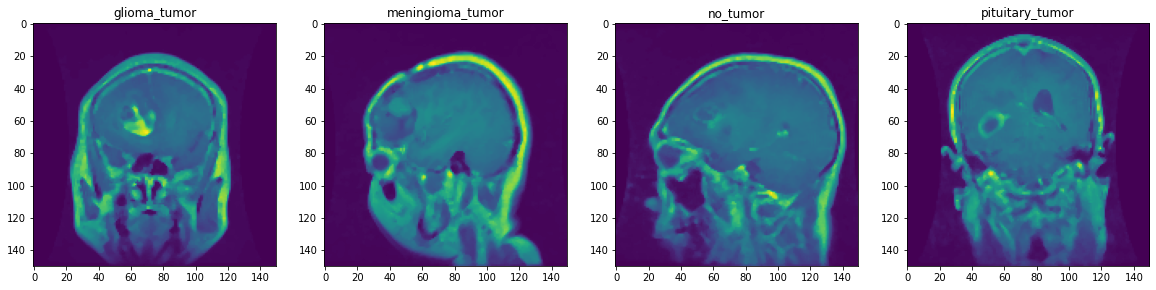

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(20,20))

idx1 = np.random.choice(list(range(0,826)))
idx2 = np.random.choice(list(range(826,1648)))
idx3 = np.random.choice(list(range(1648,2044)))
idx4 = np.random.choice(list(range(2044, 2871)))

idxs = [idx1, idx2, idx3, idx4]

for i, label in enumerate(labels):
  ax[i].imshow(X_train_median_pca[i].reshape(150, 150))
  ax[i].set_title(label)

Text(0.5, 1.0, 'Difference')

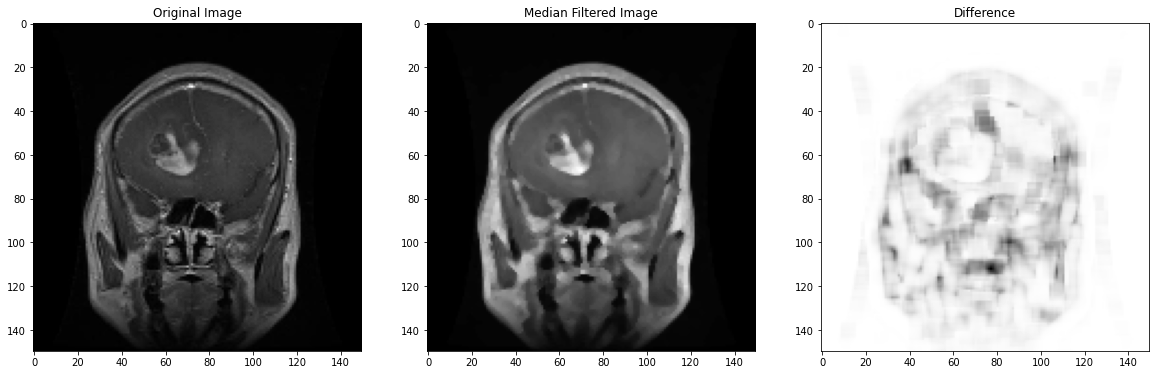

In [ ]:
(score, diff) = structural_similarity(X_train[0], X_train_median[0], full=True)

fig, ax = plt.subplots(1,3, figsize=(20,20))

ax[0].imshow(X_train[0], cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(X_train_median[0], cmap='gray')
ax[1].set_title('Median Filtered Image')
ax[2].imshow(diff, cmap='gray')
ax[2].set_title('Difference')

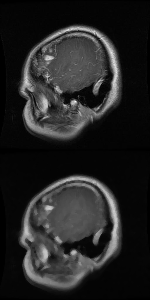

In [ ]:
from google.colab.patches import cv2_imshow

compare = np.concatenate((X_train[111], X_train_median[111]))
cv2_imshow(compare)

#### **Naive Bayes**

In [ ]:
nb_class = GaussianNB()
nb_class.fit(X_train_median_pca, y_class_train)
nb_class_score = nb_class.score(X_test_median_pca, y_class_test)
print(nb_class_score)

nb_detect = GaussianNB()
nb_detect.fit(X_train_median_pca, y_detect_train)
nb_detect_score = nb_detect.score(X_test_median_pca, y_class_test)
print(nb_detect_score)

0.23604060913705585
0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:211: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


In [ ]:
print(classification_report(y_class_test, nb_class.predict(X_test_median_pca)))
print(classification_report(y_detect_test, nb_detect.predict(X_test_median_pca)))

                  precision    recall  f1-score   support

    glioma_tumor       0.40      0.17      0.24       100
meningioma_tumor       0.16      0.10      0.13       115
        no_tumor       0.21      0.49      0.29       105
 pituitary_tumor       0.39      0.18      0.24        74

        accuracy                           0.24       394
       macro avg       0.29      0.23      0.23       394
    weighted avg       0.28      0.24      0.22       394

              precision    recall  f1-score   support

           0       0.22      0.58      0.32       105
           1       0.62      0.25      0.35       289

    accuracy                           0.34       394
   macro avg       0.42      0.41      0.33       394
weighted avg       0.51      0.34      0.34       394



In [ ]:
history.append({'Classification': nb_class_score,'Detection': nb_detect_score})

#### **kNN**

In [ ]:
knn_class = KNeighborsClassifier(n_neighbors=5)
knn_class.fit(X_train_median_pca, y_class_train)
knn_class_score = knn_class.score(X_test_median_pca, y_class_test)
print(knn_class_score)

knn_detect = KNeighborsClassifier(n_neighbors=5)
knn_detect.fit(X_train_median_pca, y_detect_train)
knn_detect_score = knn_detect.score(X_test_median_pca, y_class_test)
print(knn_detect_score)

0.5304568527918782
0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:211: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


In [ ]:
print(classification_report(y_class_test, knn_class.predict(X_test_median_pca)))
print(classification_report(y_detect_test, knn_detect.predict(X_test_median_pca)))

                  precision    recall  f1-score   support

    glioma_tumor       0.43      0.32      0.37       100
meningioma_tumor       0.78      0.39      0.52       115
        no_tumor       0.50      0.80      0.62       105
 pituitary_tumor       0.52      0.65      0.57        74

        accuracy                           0.53       394
       macro avg       0.55      0.54      0.52       394
    weighted avg       0.56      0.53      0.52       394

              precision    recall  f1-score   support

           0       0.51      0.78      0.62       105
           1       0.90      0.73      0.81       289

    accuracy                           0.74       394
   macro avg       0.71      0.76      0.71       394
weighted avg       0.80      0.74      0.76       394



In [ ]:
history.append({'Classification': knn_class_score,'Detection': knn_detect_score})

#### **Logistic Regression**

In [ ]:
lg_class = LogisticRegression(max_iter=5000, multi_class='ovr')
lg_class.fit(X_train_median_pca, y_class_train)
print(lg_class.score(X_test_median_pca, y_class_test))

lg_detect = LogisticRegression(max_iter=5000)
lg_detect.fit(X_train_median_pca, y_detect_train)
print(lg_detect.score(X_test_median_pca, y_detect_test))

0.7411167512690355
0.8604060913705583


In [ ]:
print(classification_report(y_class_test, lg_class.predict(X_test_median_pca)))
print(classification_report(y_detect_test, lg_detect.predict(X_test_median_pca)))

                  precision    recall  f1-score   support

    glioma_tumor       0.96      0.27      0.42       100
meningioma_tumor       0.76      0.97      0.85       115
        no_tumor       0.64      1.00      0.78       105
 pituitary_tumor       0.89      0.66      0.76        74

        accuracy                           0.74       394
       macro avg       0.81      0.72      0.70       394
    weighted avg       0.80      0.74      0.71       394

              precision    recall  f1-score   support

           0       0.66      1.00      0.79       105
           1       1.00      0.81      0.89       289

    accuracy                           0.86       394
   macro avg       0.83      0.90      0.84       394
weighted avg       0.91      0.86      0.87       394



In [ ]:
history.append({'Classification': knn_class_score,'Detection': knn_detect_score})

#### **Random Forest**

In [ ]:
rf_class = RandomForestClassifier(n_estimators=1000)
rf_class.fit(X_train_median_pca, y_class_train)
print(rf_class.score(X_test_median_pca, y_class_test))

rf_detect = RandomForestClassifier(n_estimators=1000)
rf_detect.fit(X_train_median_pca, y_detect_train)
print(rf_detect.score(X_test_median_pca, y_detect_test))

0.6852791878172588
0.8604060913705583


In [ ]:
print(classification_report(y_class_test, rf_class.predict(X_test_median_pca)))
print(classification_report(y_detect_test, rf_detect.predict(X_test_median_pca)))

                  precision    recall  f1-score   support

    glioma_tumor       1.00      0.18      0.31       100
meningioma_tumor       0.81      0.97      0.88       115
        no_tumor       0.53      1.00      0.69       105
 pituitary_tumor       0.92      0.49      0.64        74

        accuracy                           0.69       394
       macro avg       0.81      0.66      0.63       394
    weighted avg       0.80      0.69      0.64       394

              precision    recall  f1-score   support

           0       0.66      1.00      0.79       105
           1       1.00      0.81      0.89       289

    accuracy                           0.86       394
   macro avg       0.83      0.90      0.84       394
weighted avg       0.91      0.86      0.87       394



In [ ]:
history.append({'Classification': knn_class_score,'Detection': knn_detect_score})

#### **SVM**

In [ ]:
svm_class = SVC(kernel='rbf', degree=5000)
svm_detect = SVC(kernel='rbf', degree=5000)

svm_class.fit(X_train_median_pca, y_class_train)
svm_detect.fit(X_train_median_pca, y_detect_train)

svm_class.score(X_test_median_pca, y_class_test), svm_detect.score(X_test_median_pca, y_detect_test)

(0.6269035532994924, 0.8781725888324873)

In [ ]:
print(classification_report(y_class_test, svm_class.predict(X_test_median_pca)))
print(classification_report(y_detect_test, svm_detect.predict(X_test_median_pca)))

                  precision    recall  f1-score   support

    glioma_tumor       0.60      0.18      0.28       100
meningioma_tumor       0.65      0.90      0.75       115
        no_tumor       0.58      0.90      0.70       105
 pituitary_tumor       0.76      0.42      0.54        74

        accuracy                           0.63       394
       macro avg       0.65      0.60      0.57       394
    weighted avg       0.64      0.63      0.58       394

              precision    recall  f1-score   support

           0       0.73      0.87      0.79       105
           1       0.95      0.88      0.91       289

    accuracy                           0.88       394
   macro avg       0.84      0.87      0.85       394
weighted avg       0.89      0.88      0.88       394



In [ ]:
history.append({'Classification': knn_class_score,'Detection': knn_detect_score})

### **Non-local Means Denoising**

In [ ]:
img1, img2 = img, img

X_train_nlm = [cv2.fastNlMeansDenoising(img, h=3, templateWindowSize=7, searchWindowSize=21) for img in X_train]
X_test_nlm = [cv2.fastNlMeansDenoising(img, h=3, templateWindowSize=7, searchWindowSize=21) for img in X_test]

X_train_nlm = np.array(X_train_nlm)
X_test_nlm = np.array(X_test_nlm)

X_train_nlm_pca = np.array(X_train_nlm).reshape(X_train_nlm.shape[0], -1)
X_test_nlm_pca = np.array(X_test_nlm).reshape(X_test_nlm.shape[0], -1)


#pca1 = PCA(n_components = 150, svd_solver='randomized', whiten=True).fit(X_train_median.reshape(X_train_median.shape[0], -1))

# X_train_median = np.array(X_train_median)
# X_test_median = np.array(X_test_median)

In [ ]:
#X_train_nlm_pca = pca1.transform(X_train_nlm.reshape(X_train_nlm.shape[0], -1))
#X_test_nlm_pca = pca1.transform(X_test_nlm.reshape(X_test_nlm.shape[0], -1))

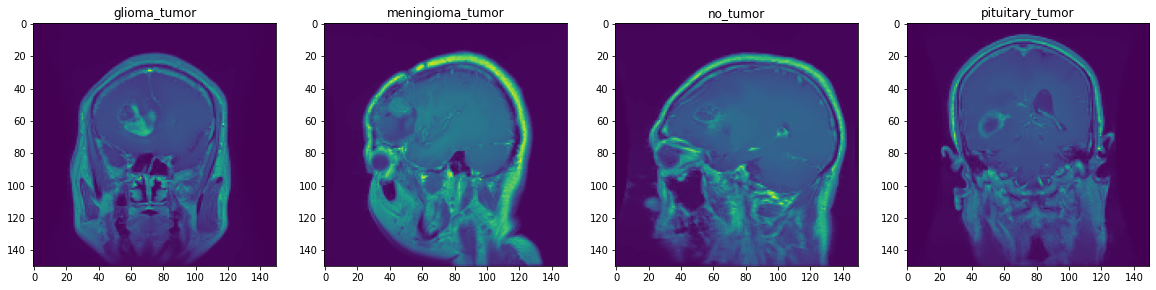

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(20,20))

idx1 = np.random.choice(list(range(0,826)))
idx2 = np.random.choice(list(range(826,1648)))
idx3 = np.random.choice(list(range(1648,2044)))
idx4 = np.random.choice(list(range(2044, 2871)))

idxs = [idx1, idx2, idx3, idx4]

for i, label in enumerate(labels):
  ax[i].imshow(X_train_nlm_pca[i].reshape(150, 150))
  ax[i].set_title(label)

Text(0.5, 1.0, 'Difference')

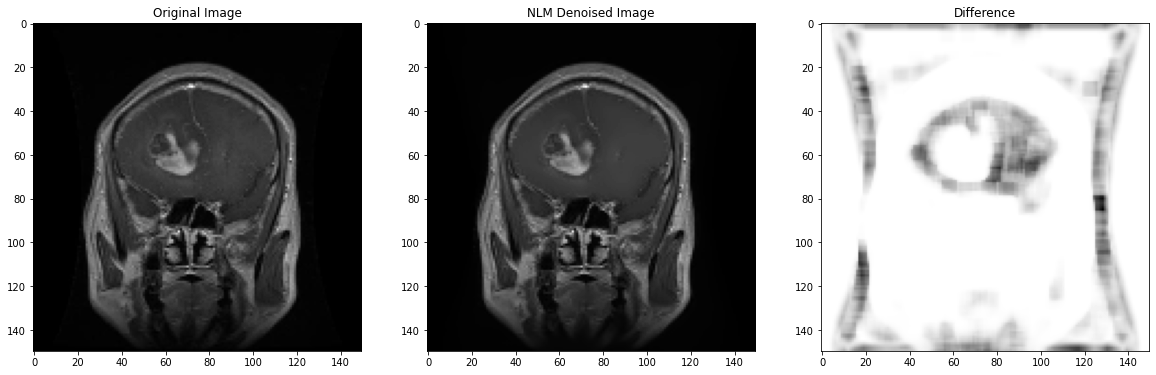

In [ ]:
from skimage.metrics import structural_similarity

(score, diff) = structural_similarity(X_train[0], X_train_nlm[0], full=True)

fig, ax = plt.subplots(1,3, figsize=(20,20))

ax[0].imshow(X_train[0], cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(X_train_nlm[0], cmap='gray')
ax[1].set_title('NLM Denoised Image')
ax[2].imshow(diff, cmap='gray')
ax[2].set_title('Difference')


# plt.imshow(diff)
# diff = cv2.absdiff(X_train[0], X_train_nlm[0])
# mask = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)

# th = 1
# imask =  mask>th

# canvas = np.zeros_like(X_train_nlm[0], np.uint8)
# canvas[imask] = X_train_nlm[0][imask]

# cv2.imwrite("result.png", canvas)

#### **Naive Bayes**

In [ ]:
nb_class = GaussianNB()
nb_class.fit(X_train_nlm_pca, y_class_train)
print(nb_class.score(X_test_nlm_pca, y_class_test))

nb_detect = GaussianNB()
nb_detect.fit(X_train_nlm_pca, y_detect_train)
print(nb_detect.score(X_test_nlm_pca, y_detect_test))

In [ ]:
print(classification_report(y_class_test, nb_class.predict(X_test_nlm_pca)))
print(classification_report(y_detect_test, nb_detect.predict(X_test_nlm_pca)))

In [ ]:
history.append({'Classification': knn_class_score,'Detection': knn_detect_score})

#### **kNN**

In [ ]:
knn_class = KNeighborsClassifier(n_neighbors=5)
knn_class.fit(X_train_nlm_pca, y_class_train)
print(knn_class.score(X_test_nlm_pca, y_class_test))

knn_detect = KNeighborsClassifier(n_neighbors=5)
knn_detect.fit(X_train_nlm_pca, y_detect_train)
print(knn_detect.score(X_test_nlm_pca, y_detect_test))

In [ ]:
print(classification_report(y_class_test, knn_class.predict(X_test_nlm_pca)))
print(classification_report(y_detect_test, knn_detect.predict(X_test_nlm_pca)))

In [ ]:
history.append({'Classification': knn_class_score,'Detection': knn_detect_score})

#### **Logistic Regression**

In [ ]:
lg_class = LogisticRegression()
lg_class.fit(X_train_nlm_pca, y_class_train)
lg_class_score = lg_class.score(X_test_nlm_pca, y_class_test)
print(lg_class_score)

lg_detect = LogisticRegression()
lg_detect.fit(X_train_nlm_pca, y_detect_train)
lg_detect_score = lg_detect.score(X_test_nlm_pca, y_class_test)
print(lg_detect_score)

In [ ]:
print(classification_report(y_class_test, lg_class.predict(X_test_nlm_pca)))
print(classification_report(y_detect_test, lg_detect.predict(X_test_nlm_pca)))

In [ ]:
history.append({'Classification': lg_class_score,'Detection': lg_detect_score})

#### **Random Forest**

In [ ]:
rf_class = RandomForestClassifier(n_estimators=10000)
rf_class.fit(X_train_nlm_pca, y_class_train)
rf_class_score = rf_class.score(X_test_nlm_pca, y_class_test)
print(rf_class_score)

rf_detect = RandomForestClassifier(n_estimators=10000)
rf_detect.fit(X_train_nlm_pca, y_detect_train)
rf_detect_score = rf_detect.score(X_test_nlm_pca, y_class_test)
print(rf_detect_score)

In [ ]:
print(classification_report(y_class_test, rf_class.predict(X_test_nlm_pca)))
print(classification_report(y_detect_test, rf_detect.predict(X_test_nlm_pca)))

In [ ]:
history.append({'Classification': rf_class_score,'Detection': rf_detect_score})

#### **SVM**

In [ ]:
svm_class = SVC(kernel='rbf', class_weight='balanced', C=1000, gamma=0.0082)
svm_detect = SVC(kernel='rbf', class_weight='balanced', C=1000, gamma=0.0082)

svm_class.fit(X_train_nlm_pca, y_class_train)
svm_detect.fit(X_train_nlm_pca, y_detect_train)

svm_class_score = svm_class.score(X_test_nlm_pca, y_class_test)
svm_detect_score = svm_detect.score(X_test_nlm_pca, y_detect_test)

print(svm_class_score)
print(svm_detect_score)

In [ ]:
print(classification_report(y_class_test, svm_class.predict(X_test_nlm_pca)))
print(classification_report(y_detect_test, svm_detect.predict(X_test_nlm_pca)))

In [ ]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_detect_test, svm_detect.predict(X_test_nlm_pca)).ravel()
precision_score = tp / (tp + fp)
recall_score = tp / (tp + fn)

precision_score, recall_score

In [ ]:
history.append({'Classification': svm_class_score,'Detection': svm_detect_score})

In [ ]:
X_train_median_nlm = [cv2.fastNlMeansDenoising(cv2.medianBlur(img, 3)) for img in X_train]
X_test_median_nlm = [cv2.fastNlMeansDenoising(cv2.medianBlur(img, 3)) for img in X_test]

X_train_median_nlm = np.array(X_train_median_nlm)
X_test_median_nlm = np.array(X_test_median_nlm)

pca1 = PCA(n_components = 150, svd_solver='randomized', whiten=True).fit(X_train_median_nlm.reshape(X_train_median_nlm.shape[0], -1))

# X_train_median = np.array(X_train_median)
# X_test_median = np.array(X_test_median)

In [ ]:
X_train_median_nlm_pca = pca1.transform(X_train_median_nlm.reshape(X_train_median_nlm.shape[0], -1))
X_test_median_nlm_pca = pca1.transform(X_test_median_nlm.reshape(X_test_median_nlm.shape[0], -1))

#### **Naive Bayes**

In [ ]:
nb_class = GaussianNB()
nb_class.fit(X_train_median_nlm_pca, y_class_train)
nb_class_score = nb_class.score(X_test_median_nlm_pca, y_class_test)
print(nb_class_score)

nb_detect = GaussianNB()
nb_detect.fit(X_train_median_nlm_pca, y_detect_train)
nb_detect_score = nb_detect.score(X_test_median_nlm_pca, y_detect_test)
print(nb_detect_score)

In [ ]:
print(classification_report(y_class_test, nb_class.predict(X_test_median_nlm_pca)))
print(classification_report(y_detect_test, nb_detect.predict(X_test_median_nlm_pca)))

In [ ]:
history.append({'Classification': nb_class_score,'Detection': nb_detect_score})

#### **kNN**

In [ ]:
knn_class = KNeighborsClassifier(n_neighbors=5)
knn_class.fit(X_train_median_nlm_pca, y_class_train)
knn_class_score = knn_class.score(X_test_median_nlm_pca, y_class_test)
print(knn_class_score)

knn_detect = KNeighborsClassifier(n_neighbors=5)
knn_detect.fit(X_train_median_nlm_pca, y_detect_train)
knn_detect_score = knn_detect.score(X_test_median_nlm_pca, y_class_test)
print(knn_detect_score)

In [ ]:
print(classification_report(y_class_test, knn_class.predict(X_test_median_nlm_pca)))
print(classification_report(y_detect_test, knn_detect.predict(X_test_median_nlm_pca)))

In [ ]:
history.append({'Classification': knn_class_score,'Detection': knn_detect_score})

#### **Logistic Regression**

In [ ]:
lg_class = LogisticRegression()
lg_class.fit(X_train_median_nlm_pca, y_class_train)
lg_class_score = lg_class.score(X_test_median_nlm_pca, y_class_test)
print(lg_class_score)

lg_detect = LogisticRegression()
lg_detect.fit(X_train_median_nlm_pca, y_detect_train)
lg_detect_score = lg_detect.score(X_test_median_nlm_pca, y_class_test)
print(lg_detect_score)

In [ ]:
print(classification_report(y_class_test, lg_class.predict(X_test_median_nlm_pca)))
print(classification_report(y_detect_test, lg_detect.predict(X_test_median_nlm_pca)))

In [ ]:
history.append({'Classification': lg_class_score,'Detection': lg_detect_score})

#### **Random Forest**

In [ ]:
rf_class = RandomForestClassifier(n_estimators=10000)
rf_class.fit(X_train_median_nlm_pca, y_class_train)
rf_class_score = rf_class.score(X_test_median_nlm_pca, y_class_test)
print(rf_class_score)

rf_detect = LogisticRegression()
rf_detect.fit(X_train_median_nlm_pca, y_detect_train)
rf_detect_score = rf_detect.score(X_test_median_nlm_pca, y_class_test)
print(rf_detect_score)

In [ ]:
print(classification_report(y_class_test, rf_class.predict(X_test_median_nlm_pca)))
print(classification_report(y_detect_test, rf_detect.predict(X_test_median_nlm_pca)))

In [ ]:
history.append({'Classification': rf_class_score,'Detection': rf_detect_score})

#### **SVM**

In [ ]:
svm_class = SVC(kernel='rbf', class_weight='balanced', C=1000, gamma=0.0082)
svm_detect = SVC(kernel='rbf', class_weight='balanced', C=1000, gamma=0.0082)

svm_class.fit(X_train_median_nlm_pca, y_class_train)
svm_detect.fit(X_train_median_nlm_pca, y_detect_train)

svm_class_score = svm_class.score(X_test_median_nlm_pca, y_class_test), 
svm_detect_score = svm_detect.score(X_test_median_nlm_pca, y_detect_test)

In [ ]:
print(classification_report(y_class_test, rf_class.predict(X_test_median_nlm_pca)))
print(classification_report(y_detect_test, rf_detect.predict(X_test_median_nlm_pca)))

In [ ]:
history.append({'Classification': svm_class_score,'Detection': svm_detect_score})

In [ ]:
pd.DataFrame(history)

In [ ]:
s = [{'s':1, 'a':3, 'd':2, 'f':4,'a':1, 's':3, 'f':2, 'd':4}]
s.append({'s':1, 'd':3, 'f':2, 'a':4})
pd.DataFrame(s)